# TEST Fast5Tools package

## Imports

In [3]:
# pycl imports
from pycl.pycl import head, tail, cat, linerange, fastcount, dir_walk, mkdir, hide_traceback, larger_display, jprint
from pycl.pycl import jhelp as help
import numpy as np
import pandas as pd
import shelve
from itertools import islice
from pprint import pprint as pp
import pysam
import sys
from tqdm import tqdm
from collections import OrderedDict, defaultdict, Counter, namedtuple

# Matplotlib imports
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 40, 5
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 1000

# Jupyter tweaking
#hide_traceback()
larger_display(100)

from Fast5Tools.Fast5 import Fast5, Fast5Error
from Fast5Tools.Fast5Wrapper import Fast5Wrapper
from Fast5Tools.Helper_fun import stderr_print, recursive_file_gen
from Fast5Tools.Basecall import Basecall
from Fast5Tools.Alignment import Alignment
from Fast5Tools.Eventalign import Eventalign
from Fast5Tools.Fast5Parse import Fast5Parse

# Test Fast5

## Fast5 init

In [4]:
help (Fast5.__init__, full=True)

Parse a Fast5 file basecalled by albacore 2.0+ with h5py and extract the datasets raw, events and fastq.

The sequence and quality are extracted from the fastq and the event array is collapsed per contiguous kmers

* fast5_fn: STR

Path to a fast5 file basecalled by albacore 2.0+

* analyses_group: STR (default Basecall_1D_000)

Name of the basecall analyses group in the fast5 file. If None the no basecall values will be fetched

* raw_read_num: INT (default 0)

Index of the raw read values in the raw group in the fast5 file. If None the no raw values will be fetched

In [5]:
f = Fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print (f)

[Fast5] file:./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5
	Read ID: 61e799eb-5571-4cc4-bbf6-b3929b197459
	Count Raw signals: 87570



In [7]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print (f)

[Fast5] file:./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5
	Read ID: 61e799eb-5571-4cc4-bbf6-b3929b197459
	Count Raw signals: 87570
	Albacore_basecalling
		Seq: UUAUCGAUUU...UCCCUUCAGG / Length: 840 / Empty kmers: 137 / Mean quality: 10.89



In [5]:
f = Fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", error_on_missing_basecall=True)
print (f)

Fast5Error: No Basecall Value

## Test Properties

In [9]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print(f.n_raw)
print(f.sequencing_kit)
print(f.flowcell_type)

87570
SQK-RNA001
FLO-MIN106


In [10]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
pp(f.metadata)

OrderedDict([('context_tags',
              OrderedDict([('experiment_duration_set', '2880'),
                           ('experiment_type', 'rna'),
                           ('fast5_output_fastq_in_hdf', '1'),
                           ('fast5_raw', '1'),
                           ('fast5_reads_per_folder', '2000'),
                           ('fastq_enabled', '0'),
                           ('fastq_reads_per_file', '4000'),
                           ('filename',
                            'antons_mac_pro_internal_sanger_ac_uk_20180625_fah77625_mn23126_sequencing_run_s1_57529'),
                           ('flowcell_type', 'flo-min106'),
                           ('kit_classification', 'none'),
                           ('local_basecalling', '0'),
                           ('local_bc_comp_model', ''),
                           ('local_bc_temp_model',
                            'template_r9.4_70bps_5mer_rna_raw.jsn'),
                           ('sample_frequency', '3012'),


In [12]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
pd.DataFrame(f.analyses["Albacore_basecalling"].kmers).head()

seq  start  end        mean  median        std
0  GGACT      0   15  578.866667   577.0  14.193269
1  ACTTC     15   60         NaN     NaN        NaN
2  ACTTC     15   60  570.333333   575.0  18.073922
3  CTTCC     60  105  541.688889   549.0  20.027561
4  TTCCC    105  120  498.933333   502.0  10.822610

## Test plot_raw

In [13]:
help (Fast5.plot_raw, full=True)

Plot raw signal and kmers boundaries

* start INT

If defined the raw plot will start at that value

* end INT

If defined the raw plot will end at that value

* plot_basecall BOOL

If True the start and end position of each kmer will be indicated by vertical lines on the graph

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

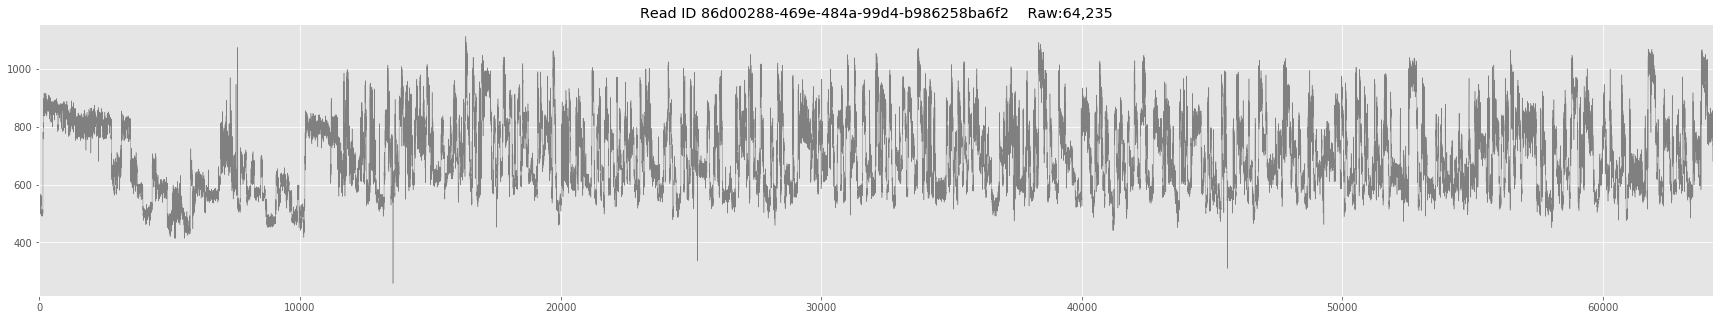

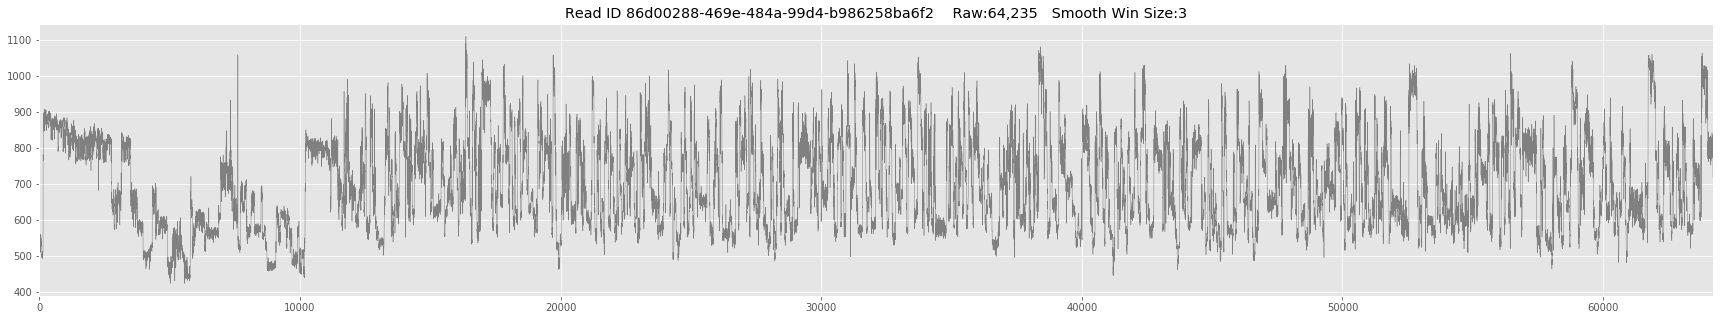

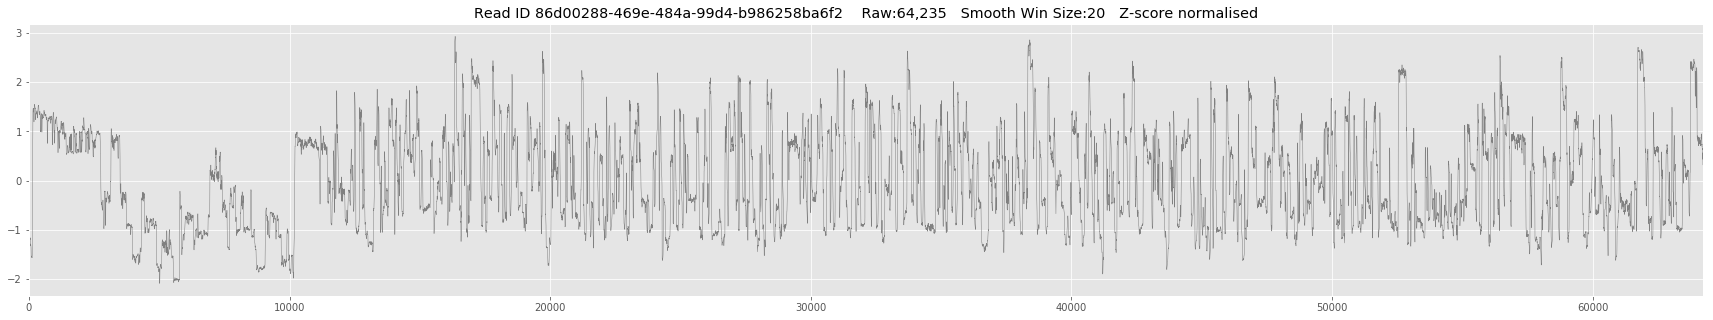

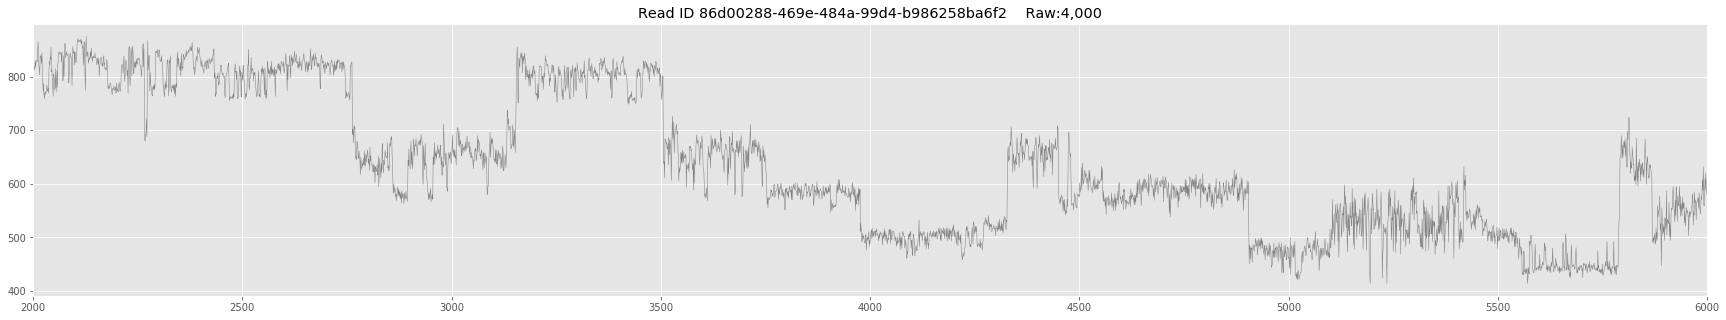

In [10]:
f = Fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_120_strand.fast5")
fig, ax = f.plot_raw ()
fig, ax = f.plot_raw (smoothing_win_size=3)
fig, ax = f.plot_raw (smoothing_win_size=20, zscore_norm=True)
fig, ax = f.plot_raw (start = 2000, end = 6000)

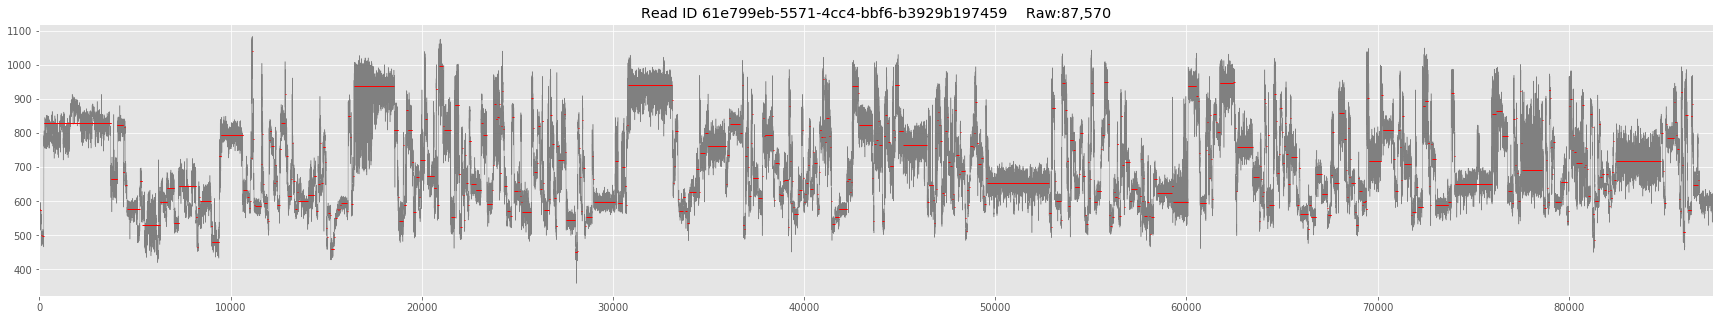

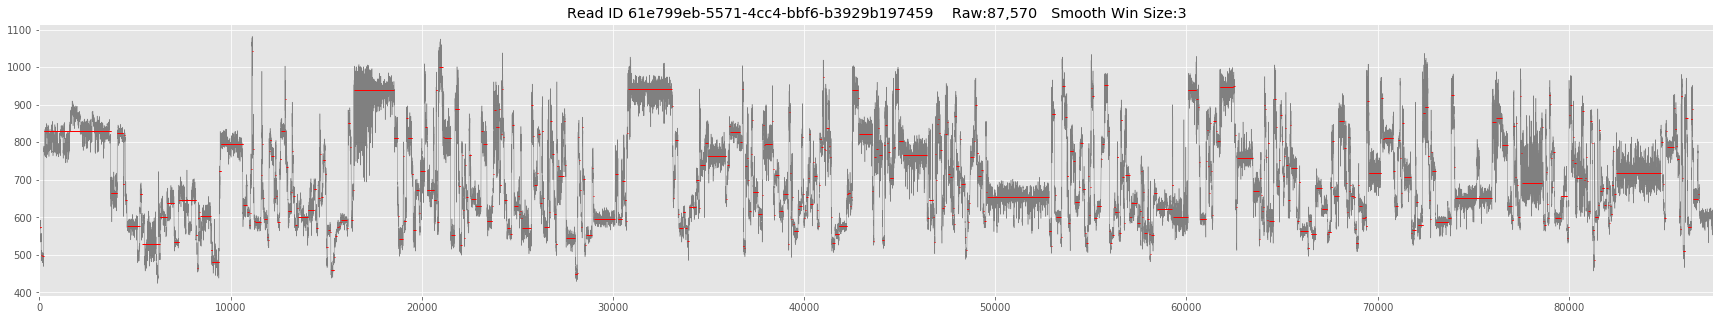

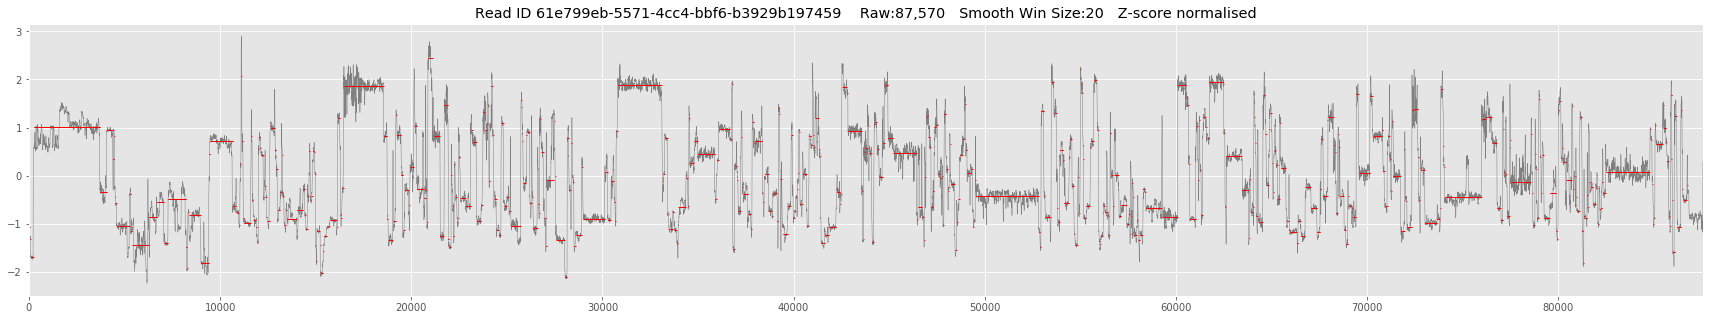

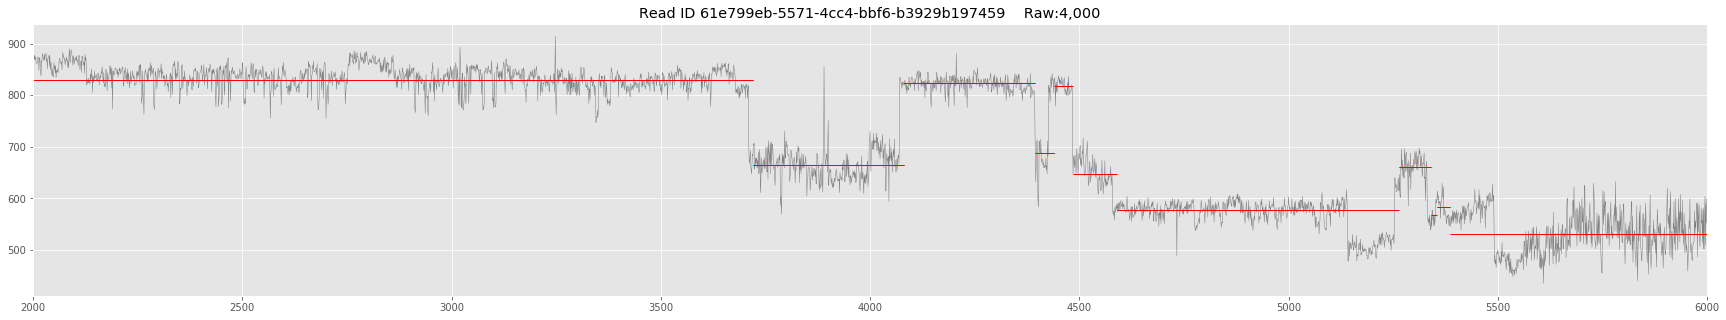

In [8]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
fig, ax = f.plot_raw ()
fig, ax = f.plot_raw (smoothing_win_size=3)
fig, ax = f.plot_raw (smoothing_win_size=20, zscore_norm=True)
fig, ax = f.plot_raw (start = 2000, end = 6000)

## Test get_raw

In [13]:
help(Fast5.get_raw, full=True)

* start INT

If defined the data will start at that value

* end INT

If defined the data will end at that value

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

In [14]:
f = Fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
%time display (f.get_raw ())
%time display (f.get_raw (zscore_norm=True))
%time display (f.get_raw (smoothing_win_size=5))
%time display (f.get_raw (start=2000, smoothing_win_size=5))
%time display (f.get_raw (start=2000, end= 2005, smoothing_win_size=5))

array([623, 578, 590, ..., 590, 591, 743], dtype=int16)

CPU times: user 1.35 ms, sys: 249 µs, total: 1.6 ms
Wall time: 2.12 ms


array([-0.68773109, -1.05224675, -0.95504257, ..., -0.95504257,
       -0.94694222,  0.28431065])

CPU times: user 4.2 ms, sys: 149 µs, total: 4.35 ms
Wall time: 3.65 ms


array([587., 583., 583., ..., 591., 667., 743.])

CPU times: user 2.16 s, sys: 0 ns, total: 2.16 s
Wall time: 2.16 s


array([877., 869., 874., ..., 591., 667., 743.])

CPU times: user 1.9 s, sys: 27 µs, total: 1.9 s
Wall time: 1.9 s


array([877., 869., 874., 869., 869.])

CPU times: user 1.86 s, sys: 0 ns, total: 1.86 s
Wall time: 1.86 s


# Fast5_parse

In [17]:
f = Fast5Parse (fast5_dir="./data/basecall/workspace/pass/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
print (f)

Initialise
Parse Fast5 files and save to database
	Valid files:22 Invalid File:0
	Invalid fast5 files summary


[Fast5Wrapper] file:./data/Fast5Tools/read.db
	Number of sequences:22


In [19]:
f.sample(2)

[[Fast5] file:./data/basecall/workspace/pass/1/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_318_strand.fast5
 	Read ID: e6a8e4d0-7b3c-471a-be26-fa7857d12663
 	Count Raw signals: 23218
 	Albacore_basecalling
 		Seq: UCUAGUAAAG...AAUCUCCAUU / Length: 388 / Empty kmers: 64 / Mean quality: 10.9,
 [Fast5] file:./data/basecall/workspace/pass/1/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_343_strand.fast5
 	Read ID: 97205d42-93ac-4c99-af78-e553f7d1ff83
 	Count Raw signals: 63526
 	Albacore_basecalling
 		Seq: CUGAAAACAA...AAAUCCCAGG / Length: 1580 / Empty kmers: 269 / Mean quality: 11.41]

In [16]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=8, verbose=True)
print (f)

Initialise
Parse Fast5 files and find blocks


[Fast5Wrapper] file:/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db
	Number of sequences:12,492


In [17]:
f.sample (2)

[[Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/3/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_259_ch_510_strand.fast5
 	Read ID: 9053b0a5-71eb-4280-85de-f01dc3ac2305
 	Count Raw signals: 40306
 	Albacore_basecalling
 		Seq: CACUUUAGCA...UUGUUAAUUA / Length: 967 / Empty kmers: 165 / Mean quality: 10.16,
 [Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/2/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_164_ch_358_strand.fast5
 	Read ID: 8c675881-199b-4203-95d8-52c90b417ee7
 	Count Raw signals: 121703
 	Albacore_basecalling
 		Seq: UAUGGCAAAC...AAUCCUCCAG / Length: 1167 / Empty kmers: 216 / Mean quality: 9.2,
 [Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_38_ch_144_strand.fast5
 	Read ID: 75c936e6-de39-405b-9394-07b9792977f5
 	Count 

In [19]:
f = Fast5Wrapper (db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db")
f

[Fast5Wrapper] file:/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db
	Number of sequences:12,492

# Alignment parsing

In [25]:
f = Fast5Parse (fast5_dir="./data/basecall/workspace/pass/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", include_secondary=True)
f.add_bam_alignment (alignment_fn="./data/align/genome_aligned_reads.bam", analysis_name="Genome_Alignment", include_secondary=True)

Initialise
Parse Fast5 files and save to database
	Valid files:22 Invalid File:0
	Invalid fast5 files summary
Parse alignment file ./data/align/cDNA_aligned_reads.bam
	Valid hits:21	Invalid hits:0	Secondary hits:1	Unmapped reads:2	Reads not in db:0
	Unique Fast5 with alignments 20
Parse alignment file ./data/align/genome_aligned_reads.bam
	Valid hits:23	Invalid hits:0	Secondary hits:1	Unmapped reads:0	Reads not in db:0
	Unique Fast5 with alignments 22


In [26]:
pp (f["1f83ee80-ac29-46be-b8bc-9dc9325f1fa7"].analyses['Transcriptome_Alignment'].read_list)
print (f["1f83ee80-ac29-46be-b8bc-9dc9325f1fa7"].analyses['Transcriptome_Alignment'].best_read())

[Query:1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-17:697 (0 pb) / Reference:YPL198W-9:723(+) (714 pb) / Alignment len:680 / Mapq:0 / Align Score:692,
 Query:1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-17:707 (819 pb) / Reference:YGL076C-9:735(+) (726 pb) / Alignment len:690 / Mapq:60 / Align Score:788]
Query:1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-17:707 (819 pb) / Reference:YGL076C-9:735(+) (726 pb) / Alignment len:690 / Mapq:60 / Align Score:788


In [27]:
pp (f["1f83ee80-ac29-46be-b8bc-9dc9325f1fa7"].analyses['Genome_Alignment'].read_list)
print (f["1f83ee80-ac29-46be-b8bc-9dc9325f1fa7"].analyses['Genome_Alignment'].best_read())

[Query:1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-98:704 (819 pb) / Reference:VII-364319:364964(-) (645 pb) / Alignment len:606 / Mapq:21 / Align Score:678,
 Query:1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-115:697 (0 pb) / Reference:XVI-174072:174690(+) (618 pb) / Alignment len:582 / Mapq:0 / Align Score:630]
Query:1f83ee80-ac29-46be-b8bc-9dc9325f1fa7-98:704 (819 pb) / Reference:VII-364319:364964(-) (645 pb) / Alignment len:606 / Mapq:21 / Align Score:678


In [3]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read_small.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", include_secondary=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam", analysis_name="Genome_Alignment", include_secondary=True)

Initialise
Parse Fast5 files and save to database
	Valid files:2,000 Invalid File:0          
	Invalid fast5 files summary
Parse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam
	Valid hits:2,259	Invalid hits:0	Secondary hits:380	Unmapped reads:121	Reads not in db:12,334
	Unique Fast5 with alignments 1879
Parse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam
	Valid hits:2,242	Invalid hits:0	Secondary hits:260	Unmapped reads:18	Reads not in db:11,776
	Unique Fast5 with alignments 1982


# NanopolishParser

In [10]:
f = Fast5Parse (fast5_dir="./data/basecall/workspace/pass/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", include_secondary=False)
f.add_nanopolish_eventalign (eventalign_fn="./data/nanopolish/nanopolish_read_index_no_sec.tsv")
f.sample (2)

Initialise
Parse Fast5 files and save to database
	Valid files:22 Invalid File:0
	Invalid fast5 files summary
Parse alignment file ./data/align/cDNA_aligned_reads.bam
	Valid hits:20	Invalid hits:0	Secondary hits:1	Unmapped reads:2	Reads not in db:0
	Unique Fast5 with alignments 20
Parse Nanopolish eventalign file ./data/nanopolish/nanopolish_read_index_no_sec.tsv


[[Fast5] file:./data/basecall/workspace/pass/1/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_348_strand.fast5
 	Read ID: 3e81c32a-f2ee-4719-a88d-e0affe93d26f
 	Count Raw signals: 44675
 	Albacore_basecalling
 		Seq: UUGCUGCUGC...UCUAAAUCUG / Length: 1133 / Empty kmers: 207 / Mean quality: 10.78
 	Transcriptome_Alignment
 		Query:3e81c32a-f2ee-4719-a88d-e0affe93d26f-0:1058 (1137 pb) / Reference:YHR174W-217:1313(+) (1096 pb) / Alignment len:1058 / Mapq:60 / Align Score:1220
 	Nanopolish_eventalign
 		Reference: YHR174W / Sequence: GTCTGCTGCT...ACAAGTTGTT / Length: 1028 ,
 [Fast5] file:./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_192_strand.fast5
 	Read ID: bcb20156-a5fe-4daa-aad9-b62c286e468d
 	Count Raw signals: 29589
 	Albacore_basecalling
 		Seq: CUGAGCUAUC...AAAUCCCAUU / Length: 302 / Empty kmers: 60 / Mean quality: 9.26
 	Transcriptome_Alignment
 		Query:bcb20156-a5fe-4daa-aad9-b62c286e468d-6:185 (306 pb) / Reference:YK

seq  start   end        mean  median        std
0  GTATC   1843  2038  607.984615   597.0  47.255712
1  ATCCC   2038  2053         NaN     NaN        NaN
2  ATCCC   2038  2053  523.800000   523.0   6.784296
3  TCCCT   2053  2083  509.666667   504.5  15.084945
4  CCCTT   2083  2128  533.111111   532.0  11.845716

ACAATTTTCAAAAATGCTTTTTGTCGCCTTTAACGCCGCTGTCGCCGCTGTCGCTTTGCCGCTGGTTAACAATTTTGCCAATTAAAATTTTCAGCCAACTTGGAAGGACGGCTTTTCCGAAAATGTTTTCCCCAGCTTGGTTTCCACCGCTACCCTTCCCCTGGCGAAGTTATCAATAAACCAACATTGGTGCCCTGTTCTTAAACCCCAAAGAACGGTACTTTTACTGCTGGTCCCGGTTTCCTTACTGGAGCTTAAAAACACCTCTGCCGGCTTTATTACTCTGGTTCCTCCTCTGGTGCTGCTGCTAAGGCTTTTTTCAATTCAACTTCTGGTGCCTTGTTTGCTGGTGGCGCCGCCTTTTGTTGTTTATTTTTGGTTTAATATTATTTTTTTACCCTAAATTTTTTTTTTTATAAACTTCTTGGCATTTAACAAATAAATAATTGGATTTAGGAAAAATTTTTAATTTTTAAATTATTCCCCTTCCCCTTTCTTAATCCCCCCCAACAAAAAAAATCCAAAACAAACTGGCCAACTACCCTTCCCCATG


seq  start    end  ref_pos        mean  median        std
0  TGTTG   9815   9871      394  723.571429   682.5  91.400777
1  TTGTT   9871   9998      393  733.212598   744.0  53.377371
2  GTTGT   9998  10026      392  651.821429   649.5  21.166101
3  TGTTG  10026  10184      391  756.303797   748.0  70.583886
4  TTGTT  10184  10208      390  783.208333   787.5  20.690133

GCTCGCTTCTATCGCCGCTGTCGCCGCTGTCGCTTCTGCCGCTGCTAACGTTACCACTGCTACTGTCAGCCAAGACTACCACTTTGGTCACCATCACTTCTTGTGACCACGTCTGTTCAAACTCCCCAGCTTGGTTTCCACCGCTACCGTCACCGTCGATGACGTTATCACTCAATACACCACCTGGTGCCCATTGACCACTGAAGCCCAAAGAACGGTACTTCTACTGCTGCTCCAGTTACCTCTACTGAAGCTCCAAAGAACACCACCTCTGCTGCCAACTCACTCTCACCTCTTACACTGGTGCTGCTGCTAAGGCTTTGCCAGCTGCTGGTGCTTTGTTGGCTGGTGCCGCTGCTTTGTTGTGT


(<Figure size 2880x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23da4865c0>)

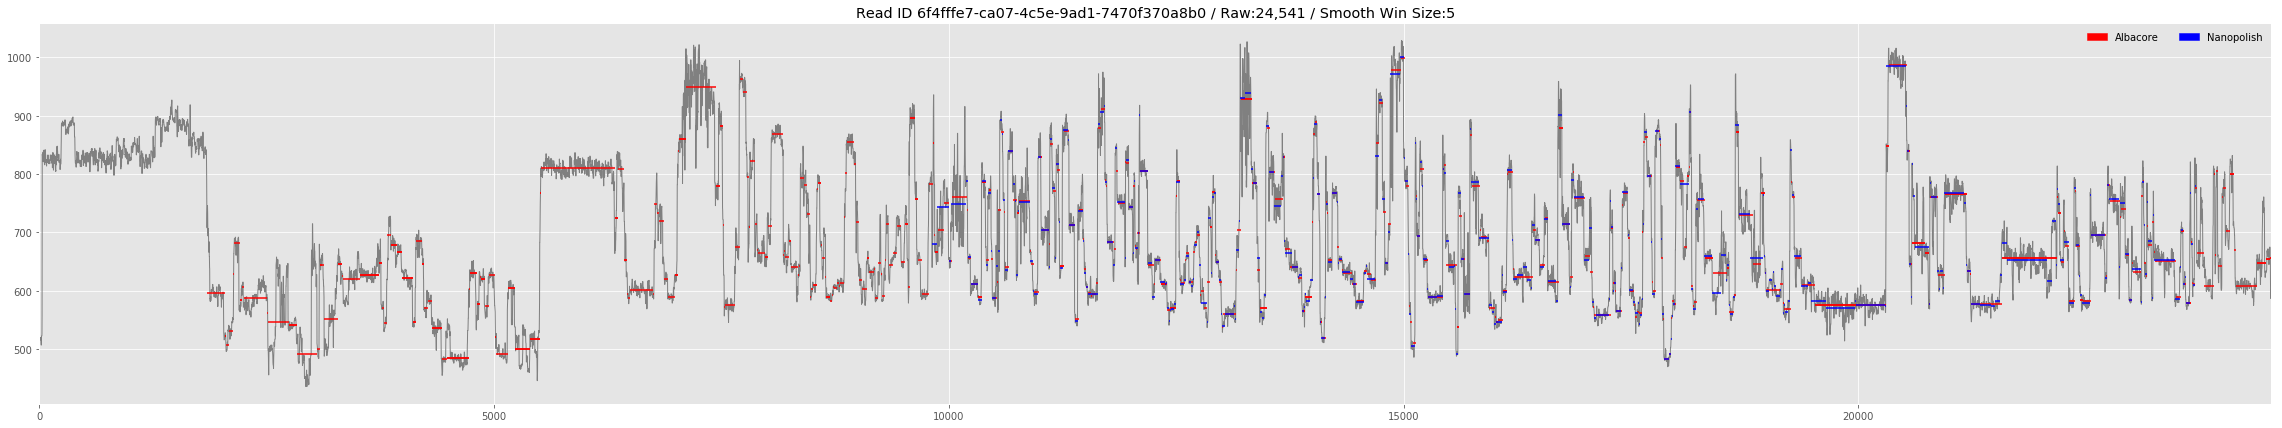

In [15]:
read_name = "6f4fffe7-ca07-4c5e-9ad1-7470f370a8b0"
jprint ("Albacore", bold=True, size=110)
display (f[read_name].analyses['Albacore_basecalling'].kmers_df.head())
print (f[read_name].analyses['Albacore_basecalling'].kmer_seq)

jprint ("Nanopolish", bold=True, size=110)
display (f[read_name].analyses['Nanopolish_eventalign'].kmers_df.head())
print (f[read_name].analyses['Nanopolish_eventalign'].kmer_seq)

f[read_name].plot(figsize=(40,7), smoothing_win_size=5, raw_linewidth=1)

/home/aleg/.virtualenvs/Python3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


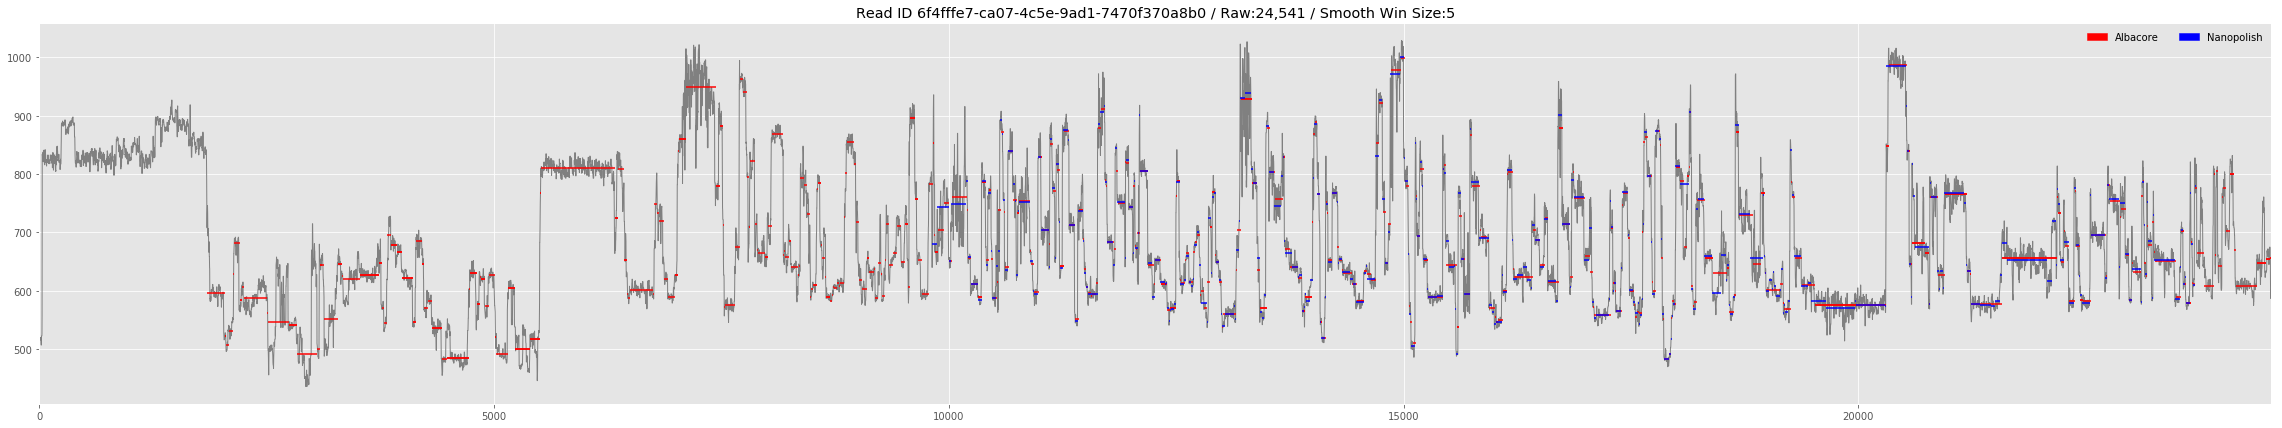

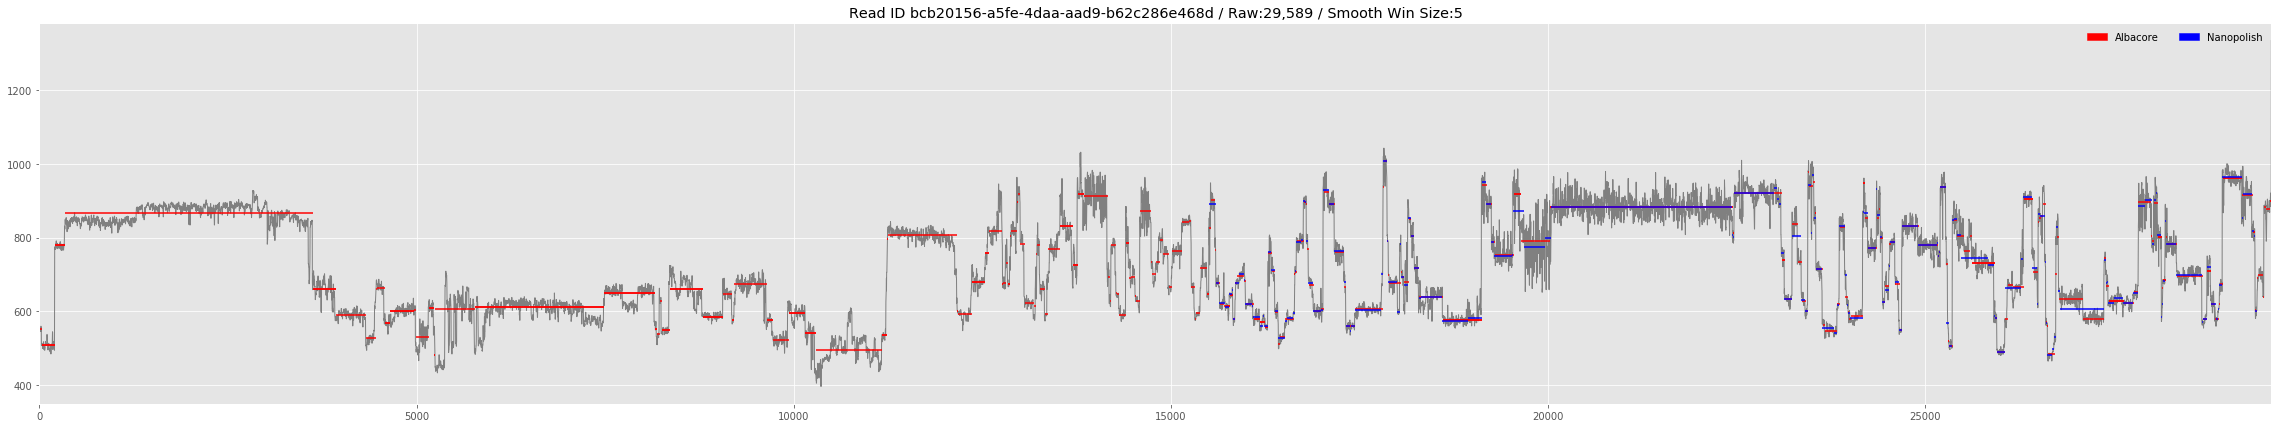

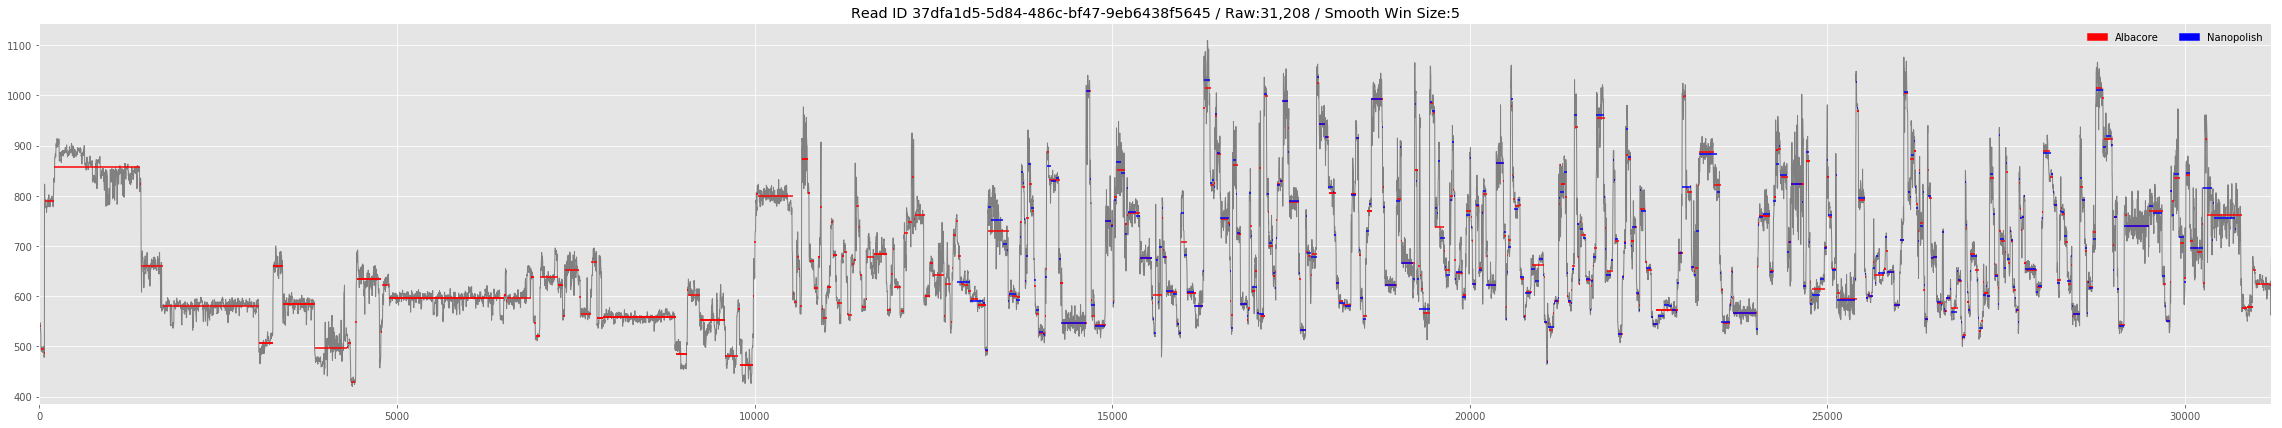

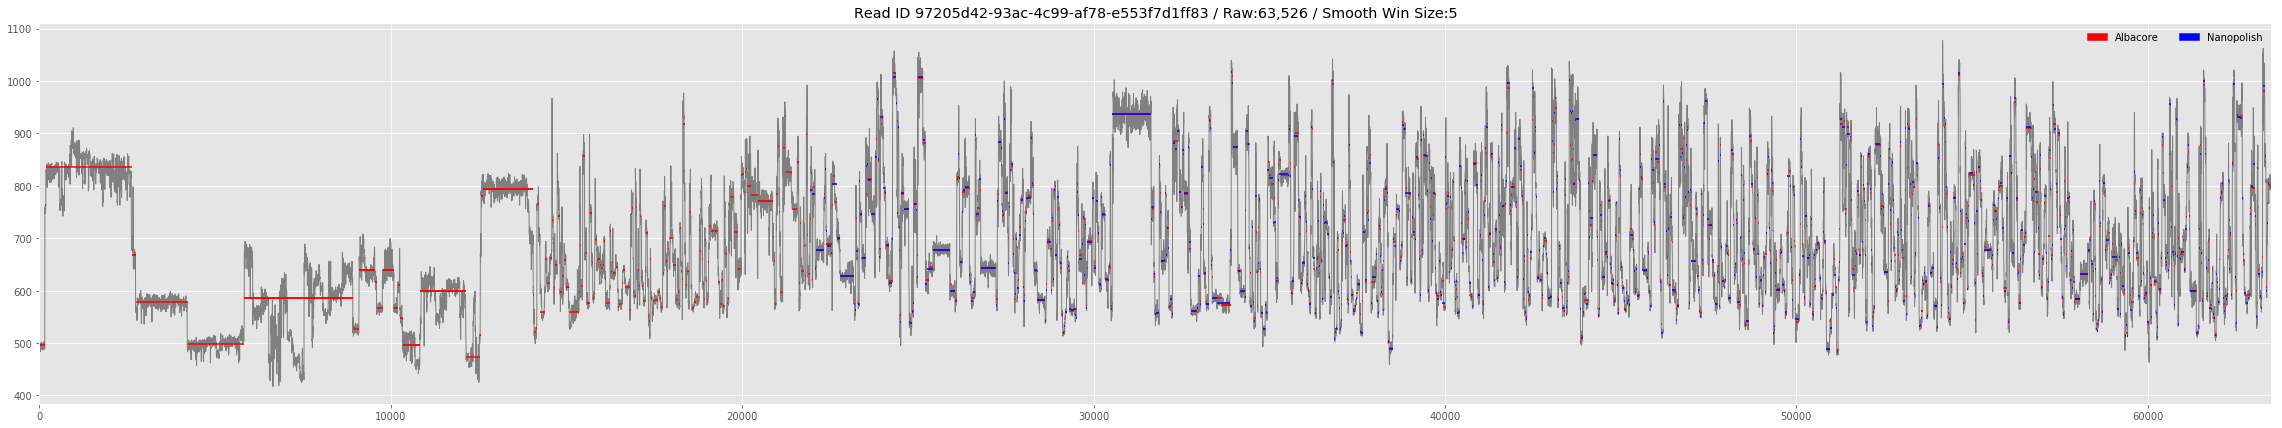

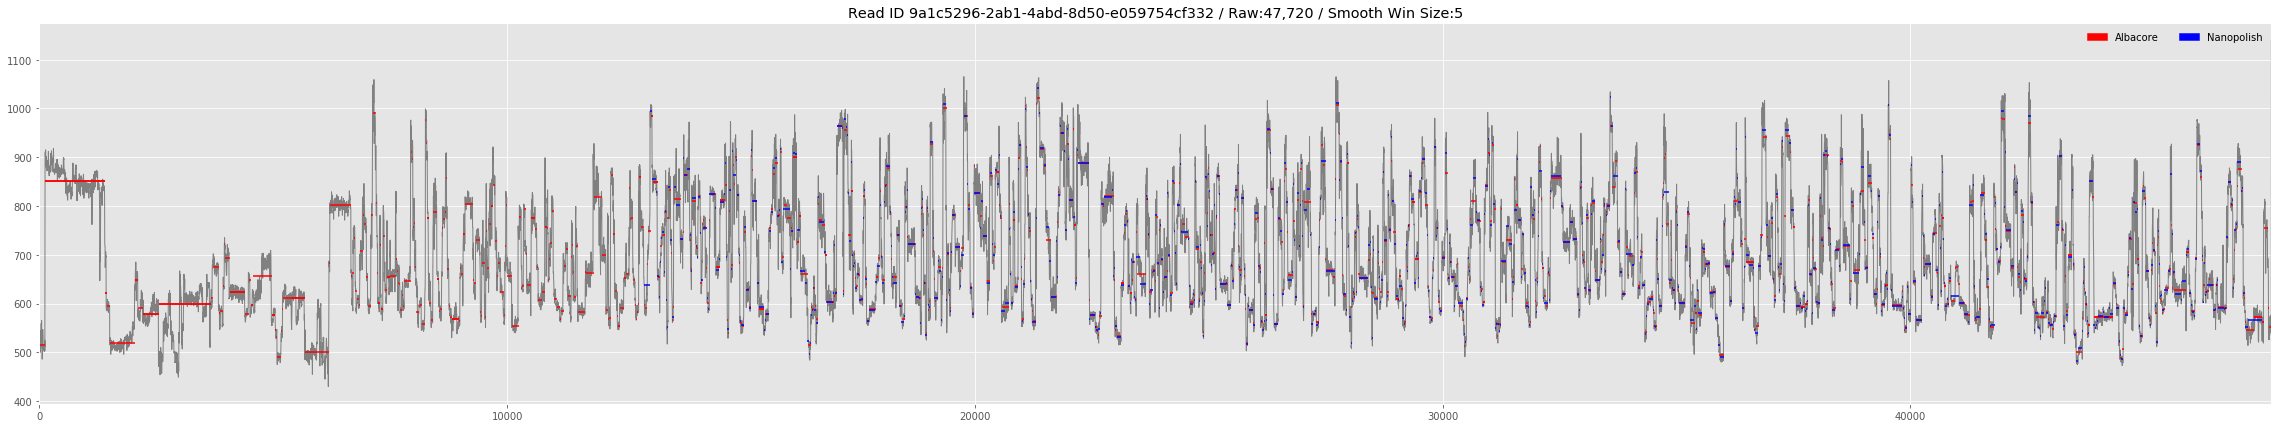

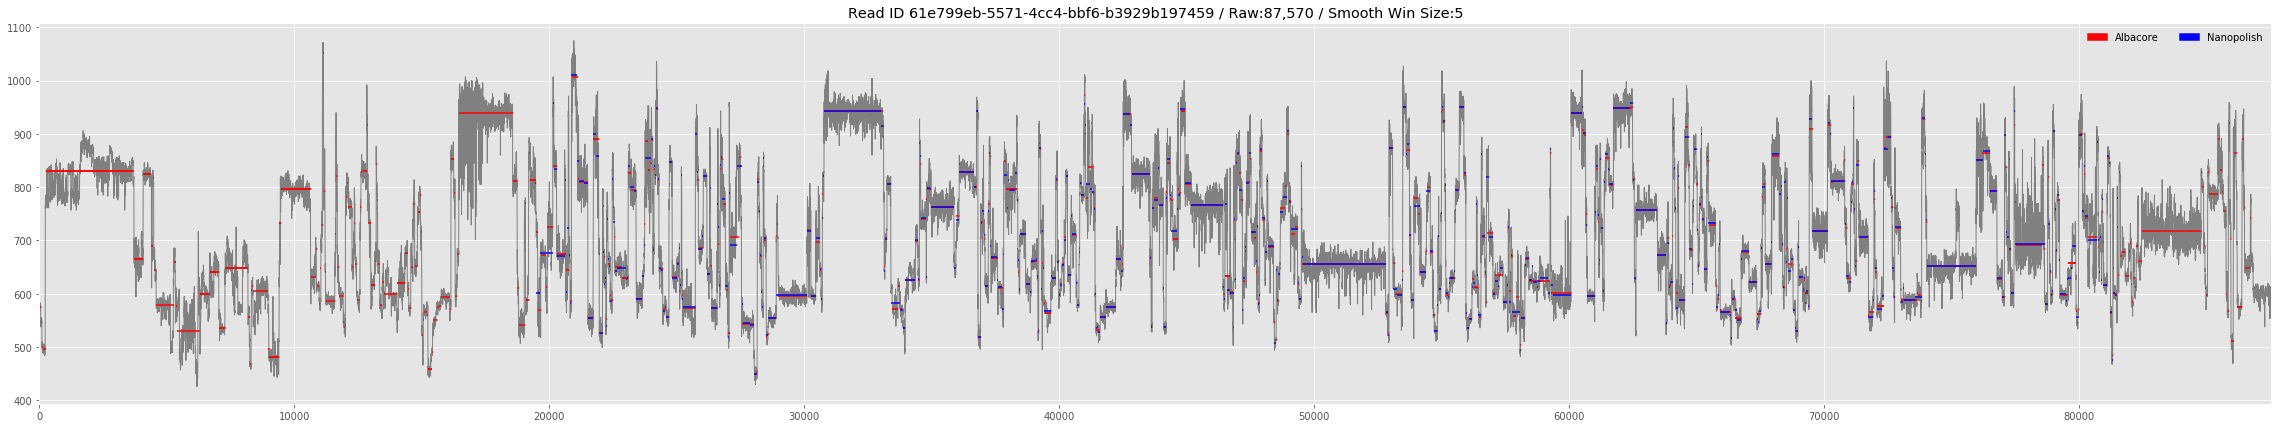

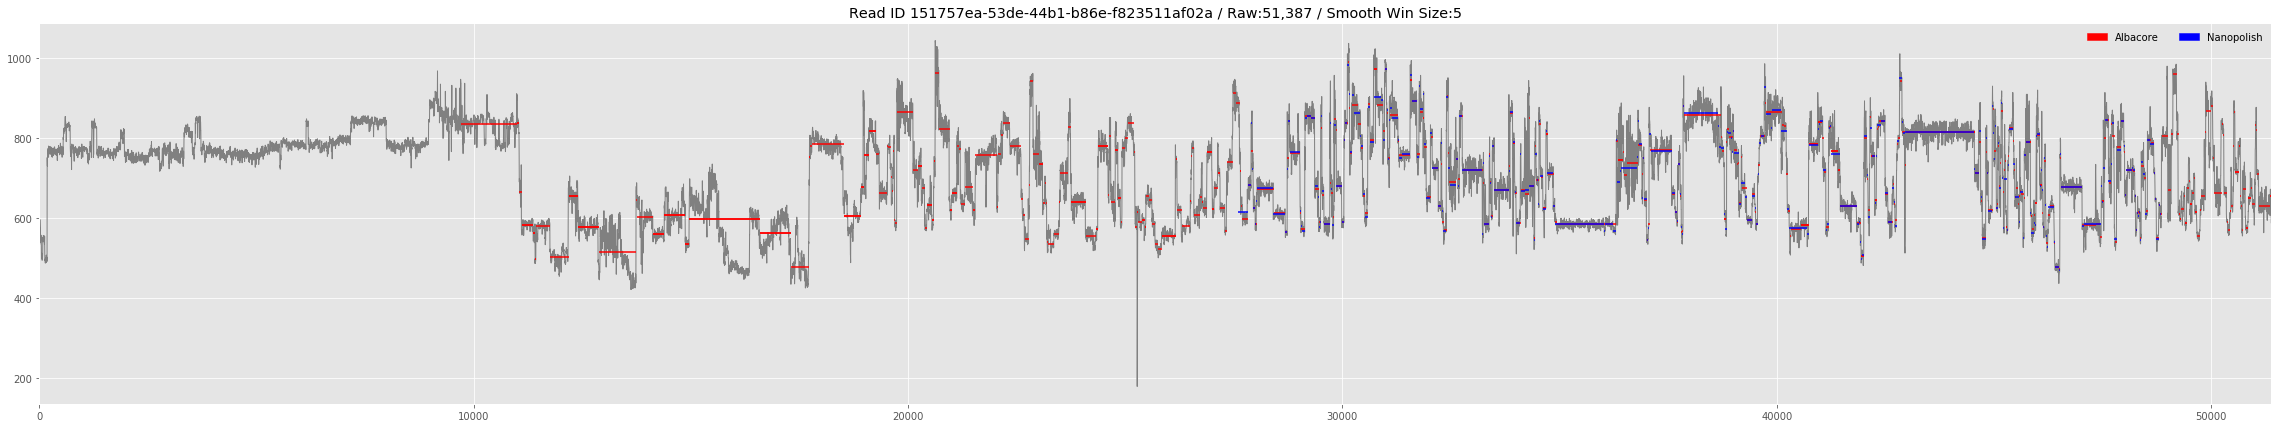

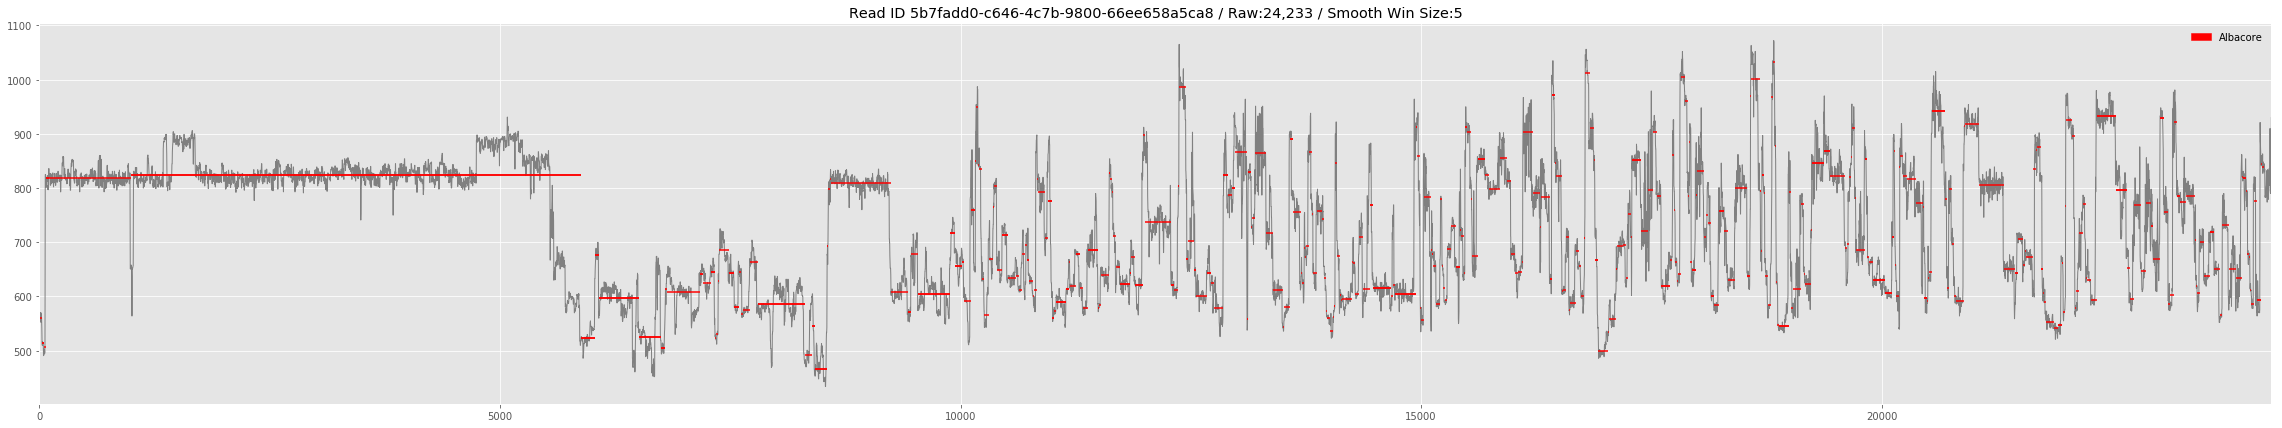

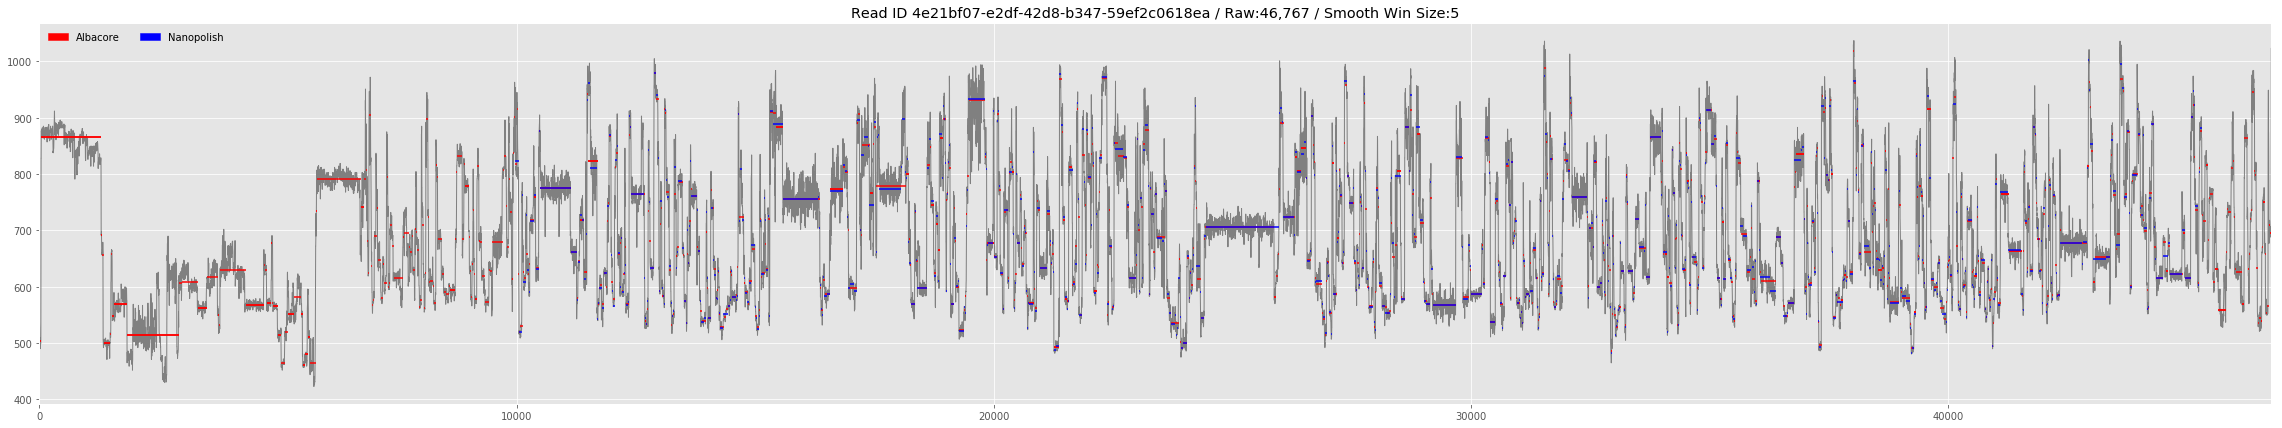

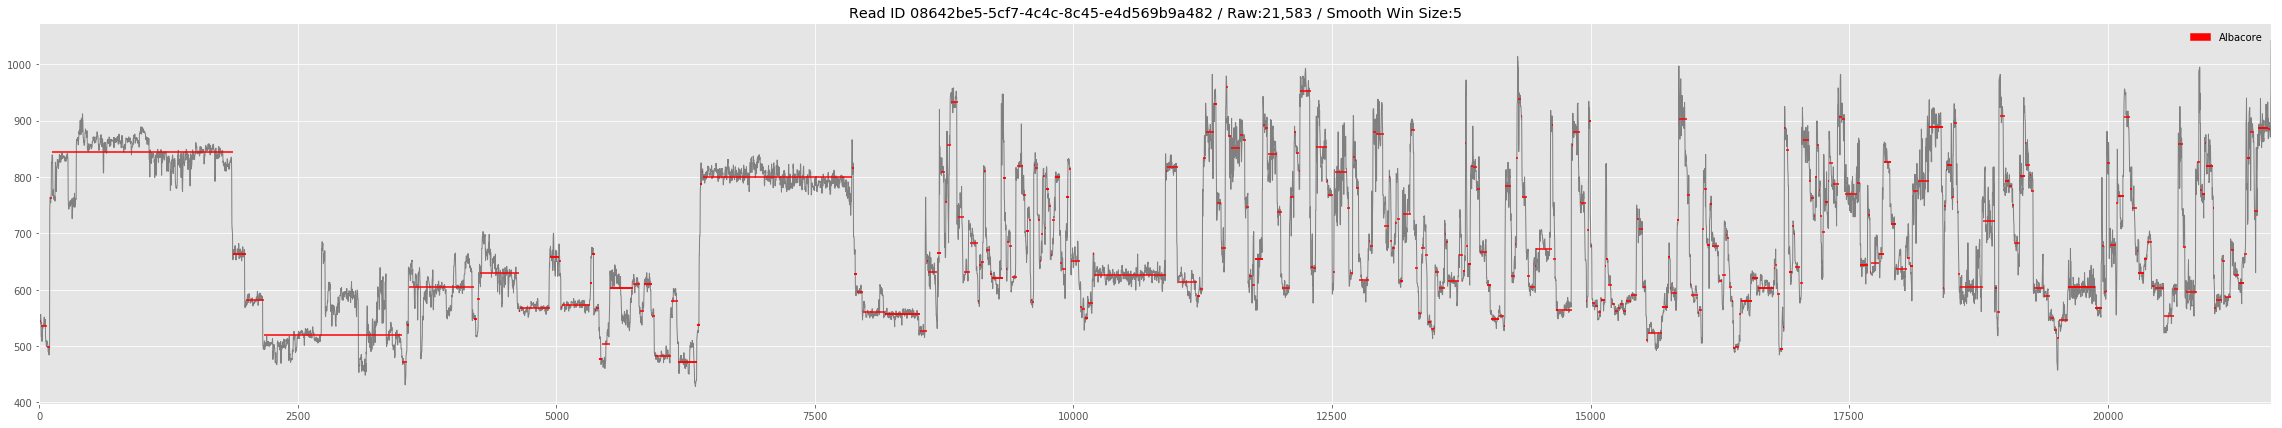

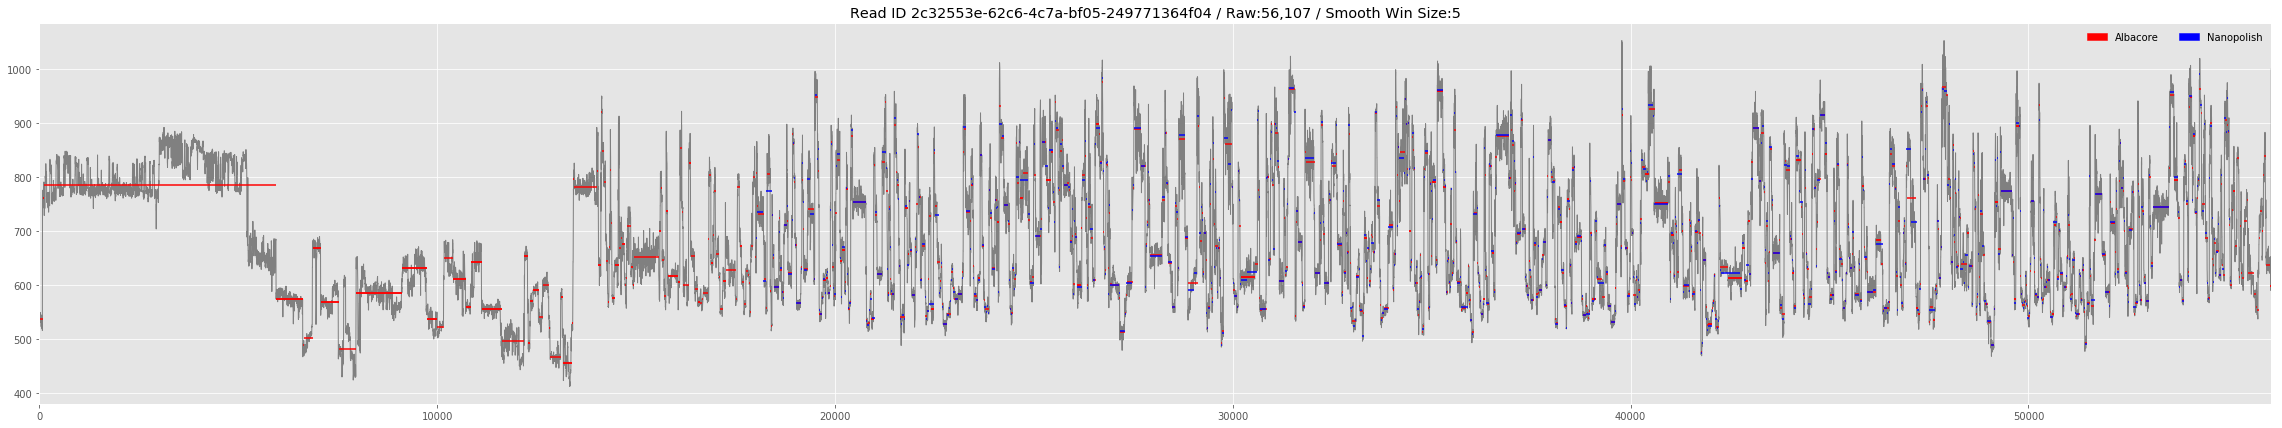

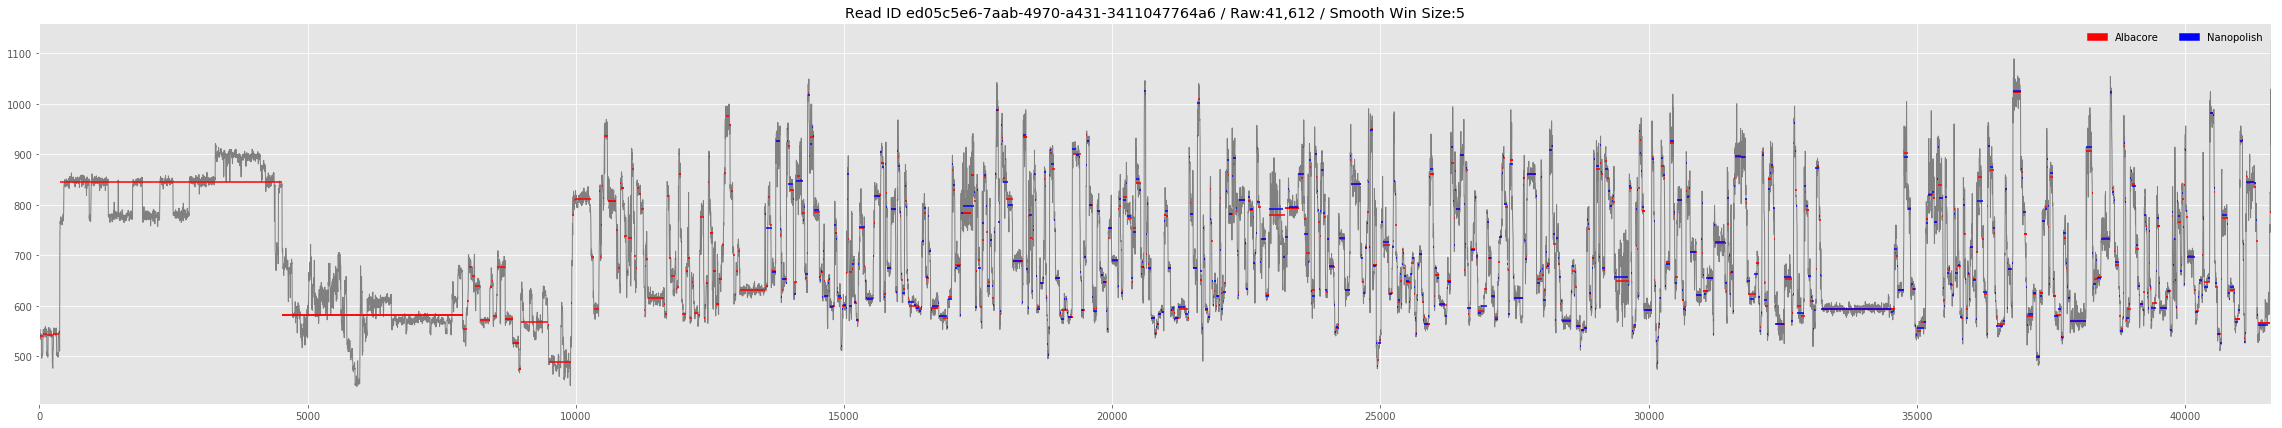

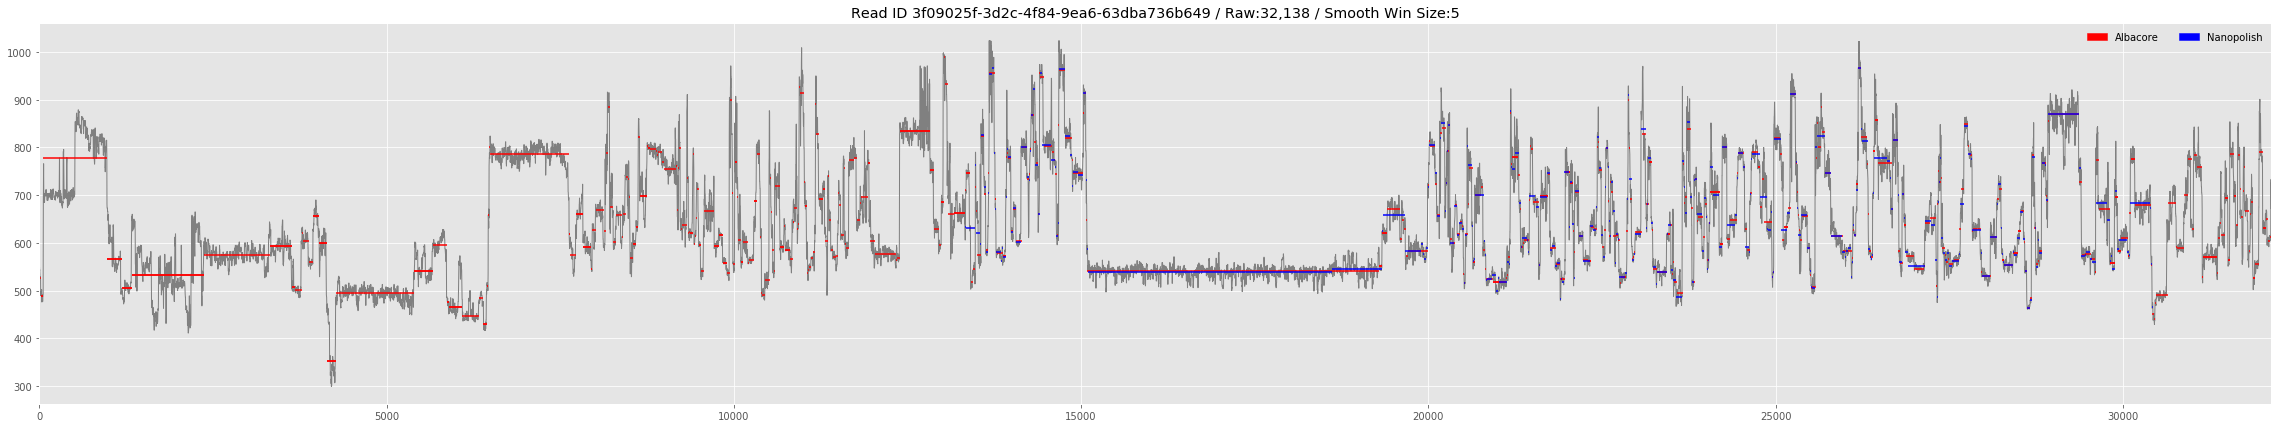

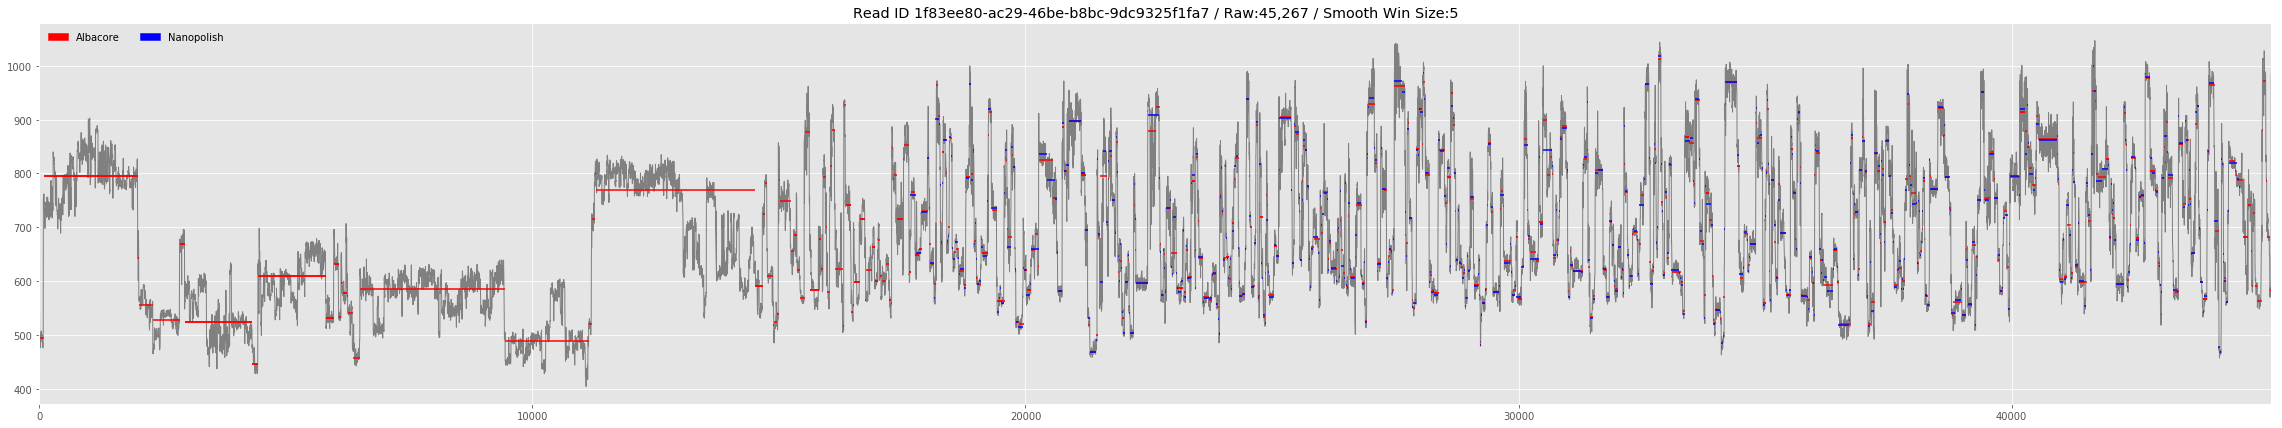

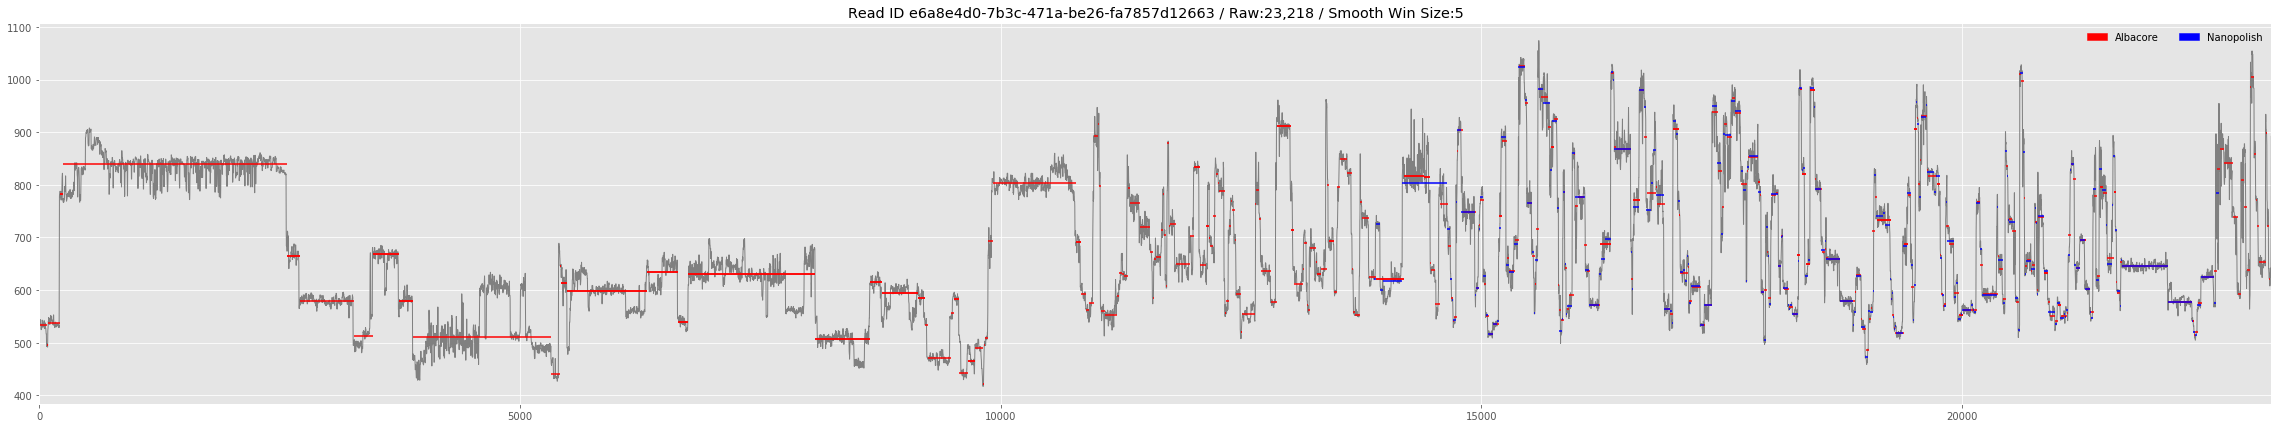

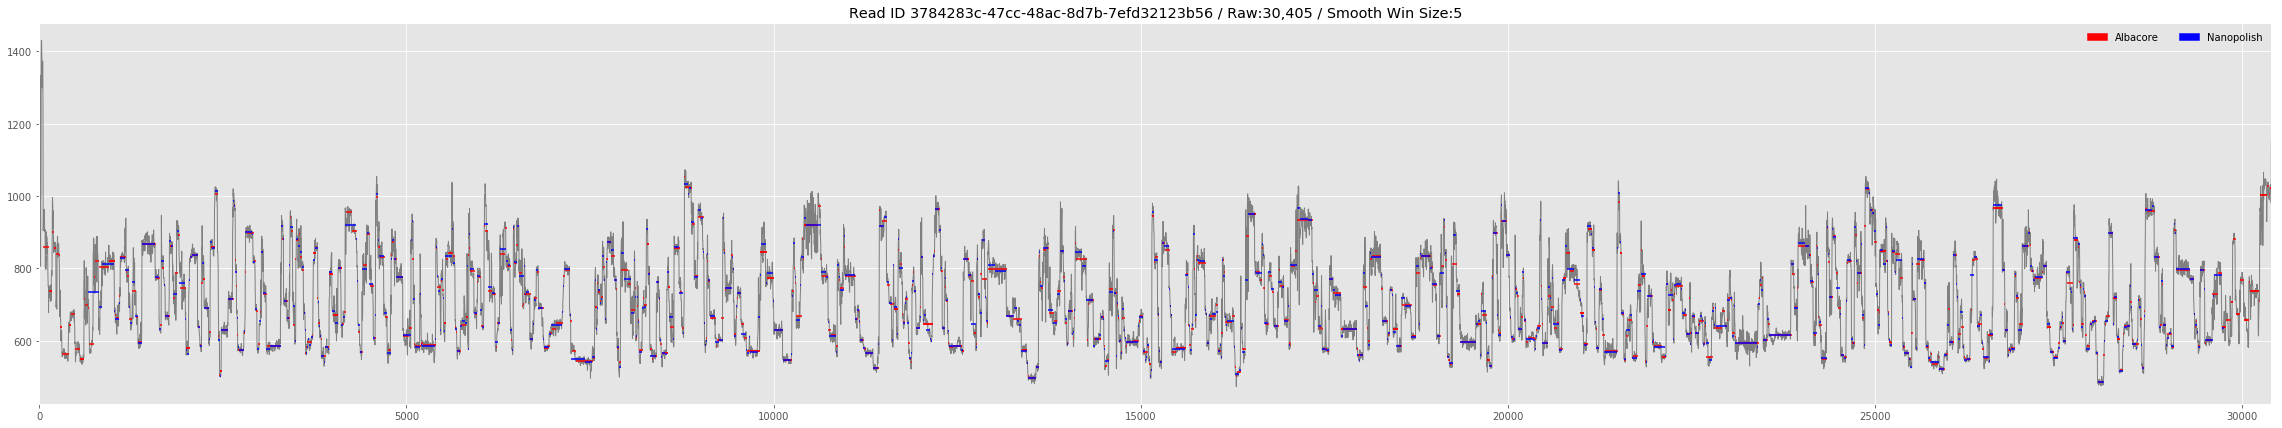

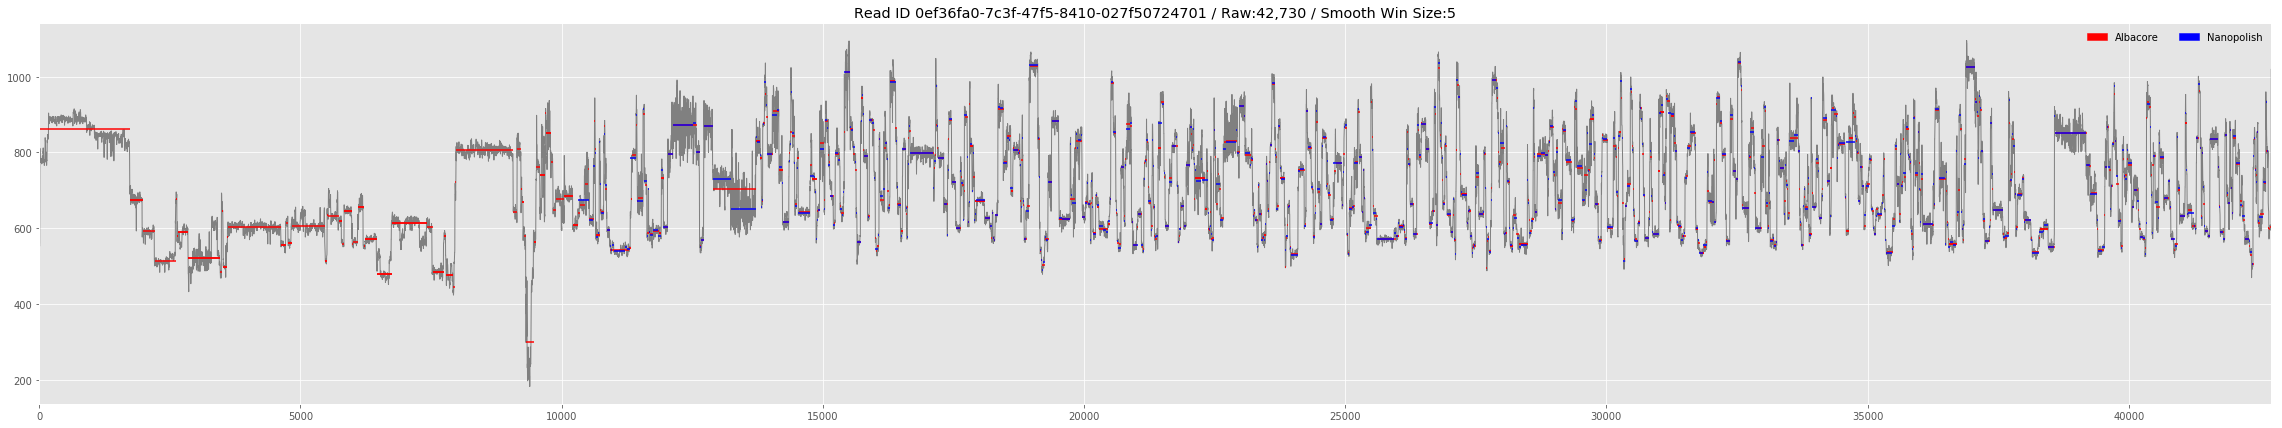

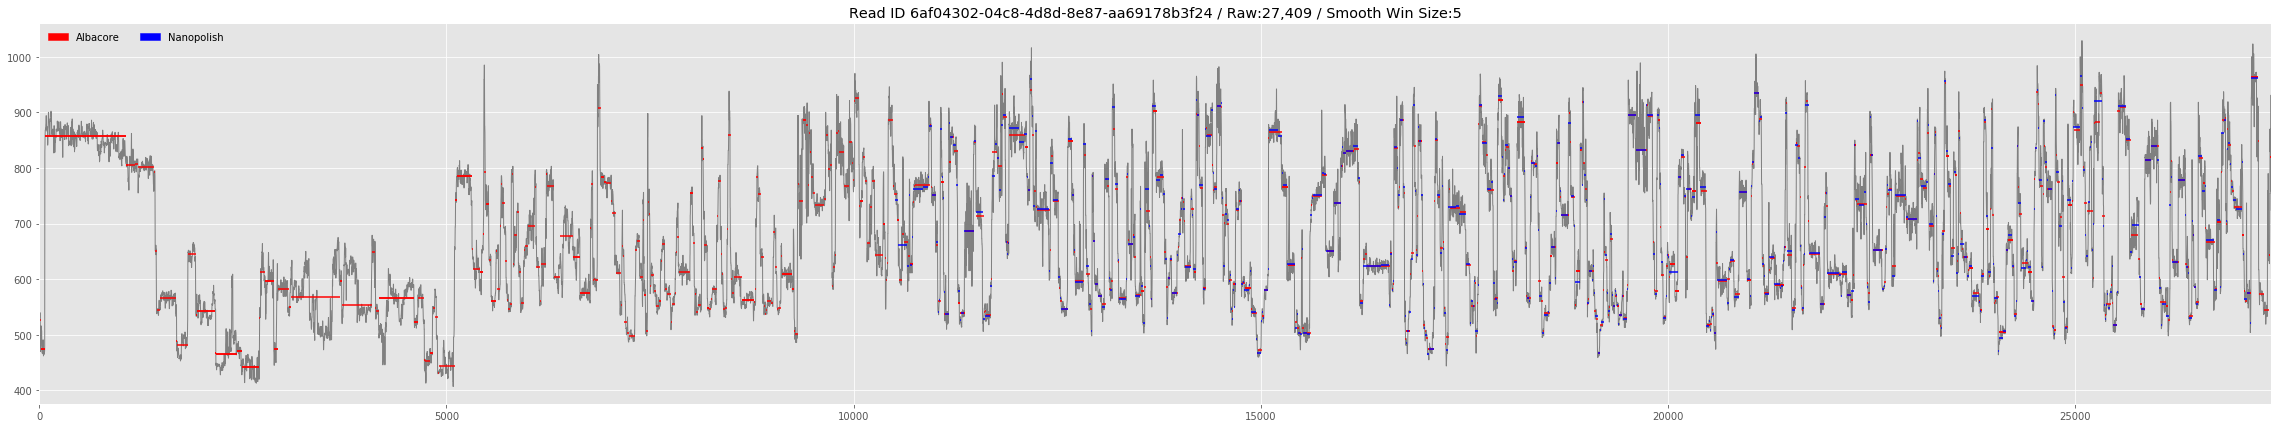

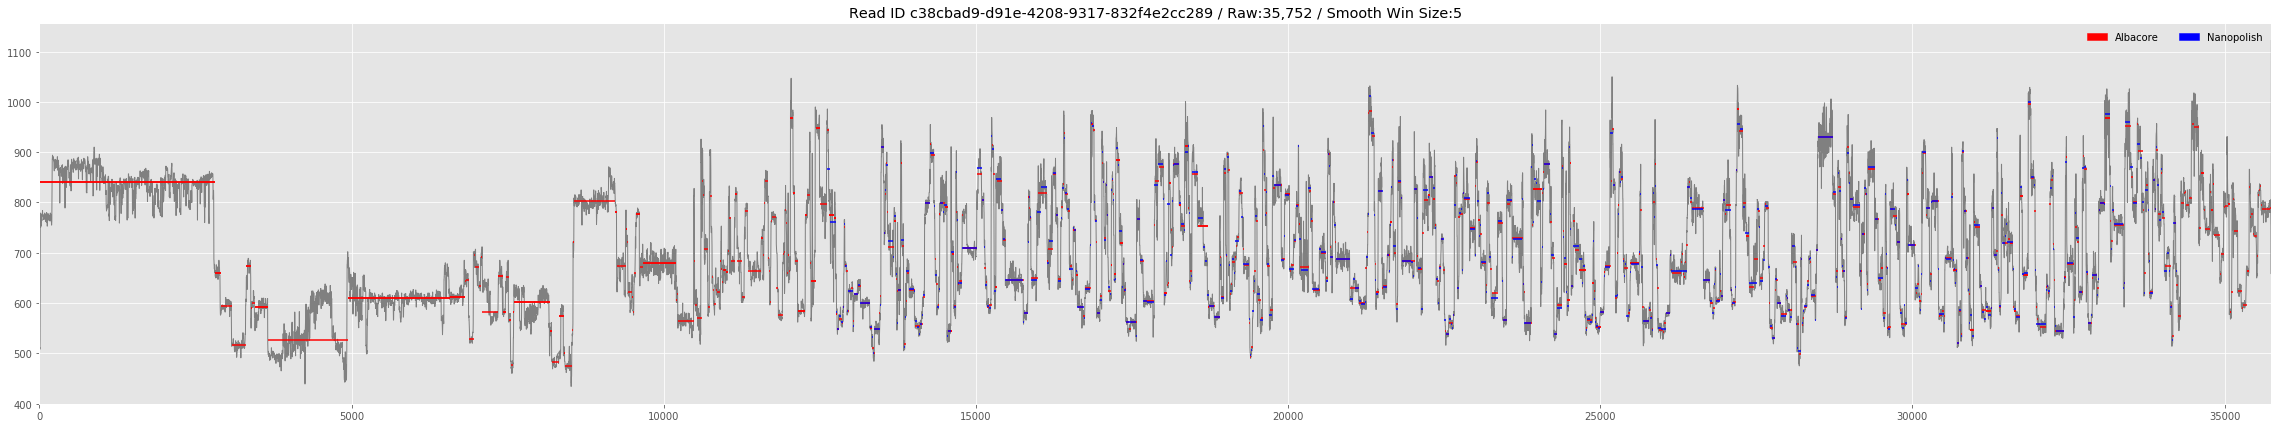

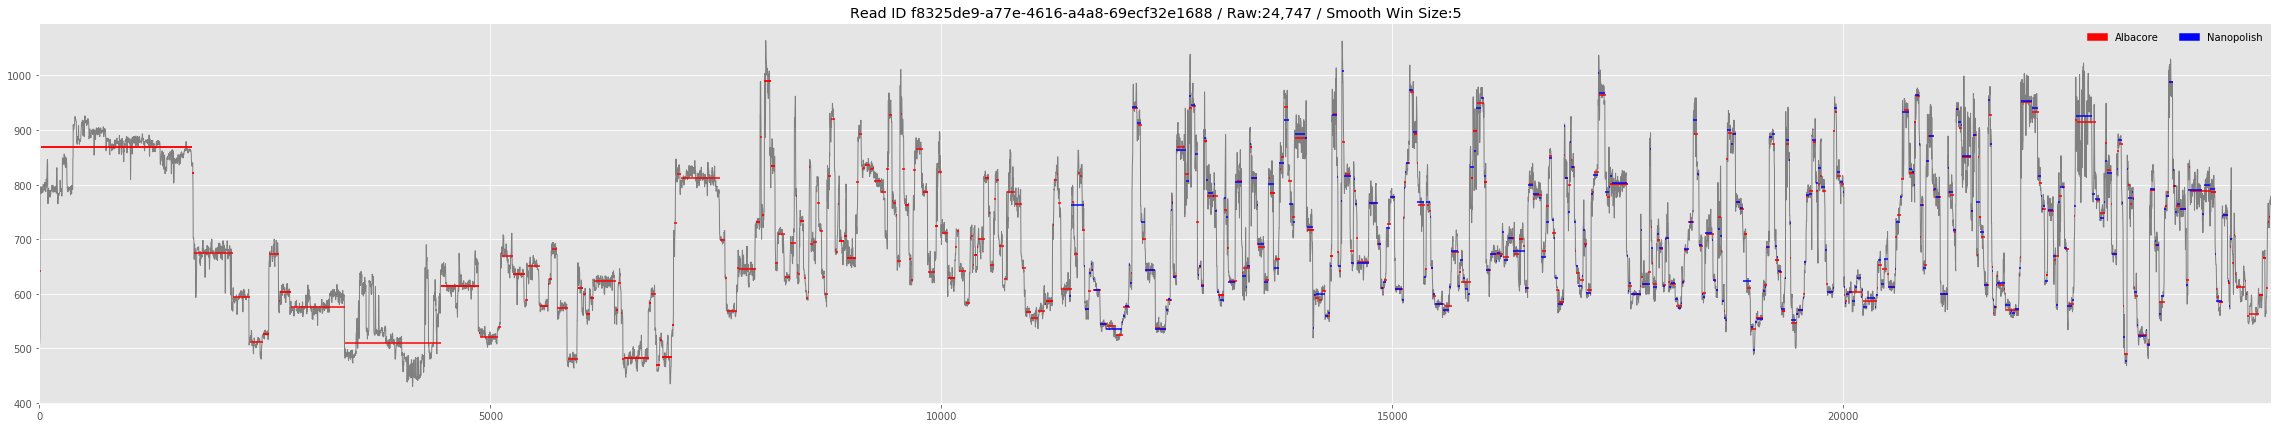

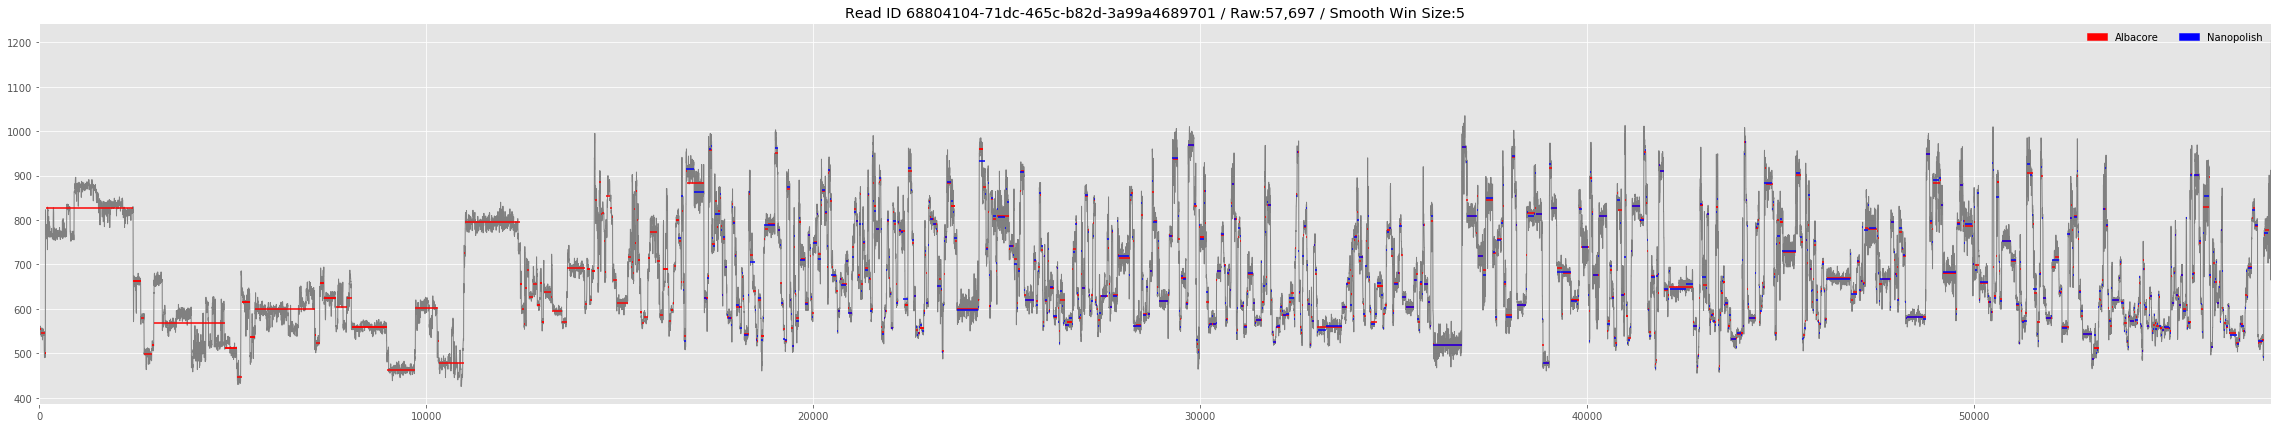

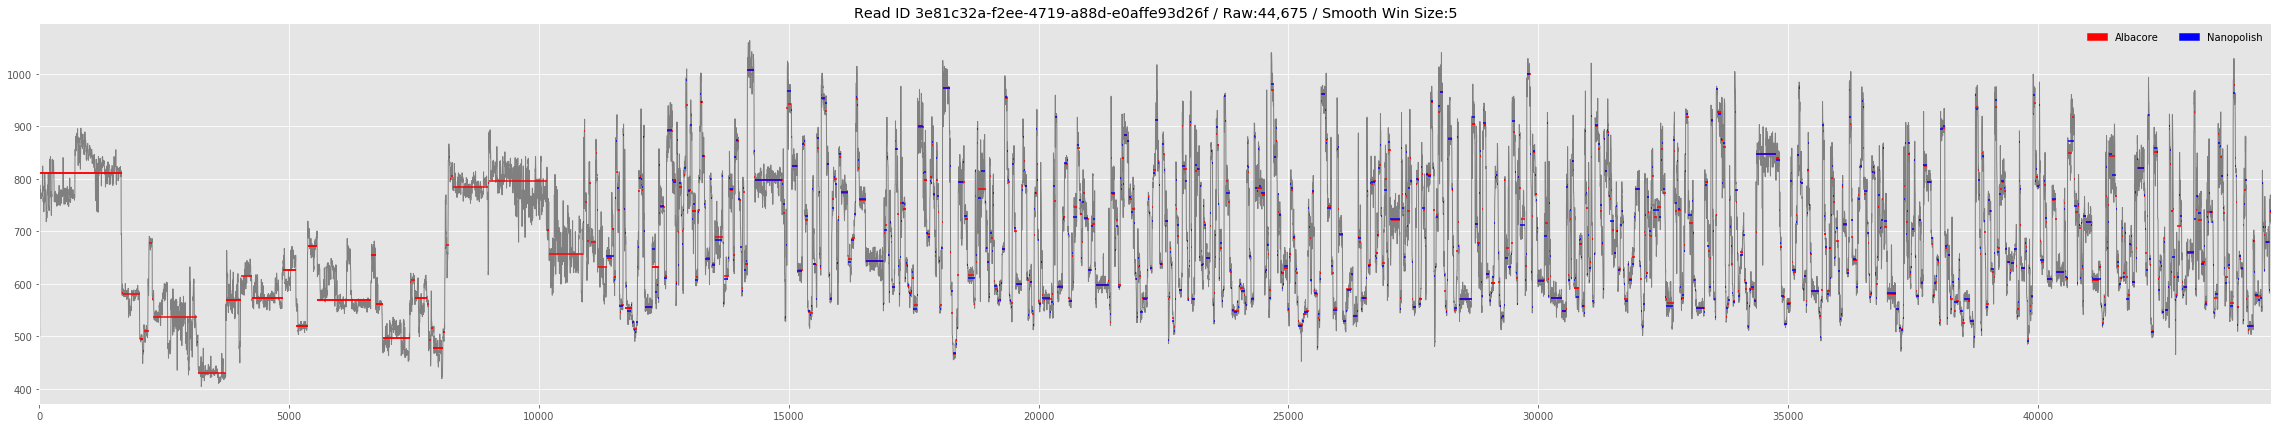

In [7]:
f = Fast5Wrapper ("./data/Fast5Tools/read.db")
for r in f: 
    fig, ax = r.plot(figsize=(40,7), smoothing_win_size=5, raw_linewidth=1)

In [8]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read_small.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads_no_sec.bam", analysis_name="Transcriptome_Alignment", include_secondary=False)
f.add_nanopolish_eventalign (eventalign_fn="/home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_index_no_sec.tsv")

Initialise
Parse Fast5 files and save to database
	Valid files:2,000 Invalid File:0
	Invalid fast5 files summary
Parse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads_no_sec.bam
	Valid hits:1,879	Invalid hits:0	Secondary hits:0	Unmapped reads:0	Reads not in db:9,819
	Unique Fast5 with alignments 1879
Parse Nanopolish eventalign file /home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_index_no_sec.tsv
/home/aleg/.virtualenvs/Python3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aleg/.virtualenvs/Python3.6/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aleg/.virtualenvs/Python3.6/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/aleg/.virtualenvs/Python3.6/lib/python3.6/site-packa

In [9]:
f.sample()

[[Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_104_ch_76_strand.fast5
 	Read ID: 9e47edee-0443-4e31-9394-0b4c6adcf219
 	Count Raw signals: 29600
 	Albacore_basecalling
 		Seq: CUAAUCAAGA...CAAUCCCAGG / Length: 565 / Empty kmers: 107 / Mean quality: 10.0
 	Transcriptome_Alignment
 		Query:9e47edee-0443-4e31-9394-0b4c6adcf219-10:452 (569 pb) / Reference:YGL103W-0:450(+) (450 pb) / Alignment len:442 / Mapq:9 / Align Score:528
 	Nanopolish_eventalign
 		Reference: YGL103W / Sequence: TCCCTTCCAG...GATCGCTTTC / Length: 435 ,
 [Fast5] file:/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/antons_mac_pro_internal_sanger_ac_uk_20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_22_ch_162_strand.fast5
 	Read ID: 4390d49f-de5c-4d9e-b774-4937e18dc95a
 	Count Raw signals: 33370
 	Albacore_basecalling
 		Seq: UCGGUCACGA...CAAAAUCCAG / Length: 693 / Empty kmers: 123 / 